In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')

In [6]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999
COLLEGE,zero,one,one,zero,one,zero,zero,one,zero,zero,...,zero,zero,one,zero,one,one,zero,zero,zero,zero
INCOME,31953,36147,27273,120070,29215,133728,42052,84744,38171,105824,...,27366,124921,63689,82467,74381,100264,26075,147061,134533,71381
OVERAGE,0,0,230,38,208,64,224,0,0,174,...,166,0,0,55,60,0,0,0,0,65
LEFTOVER,6,13,0,33,85,48,0,20,7,18,...,7,9,8,30,38,0,32,27,23,73
HOUSE,313378,800586,305049,788235,224784,632969,697949,688098,274218,153560,...,239676,848645,787656,809695,864153,230971,939297,848387,519574,453696
HANDSET_PRICE,161,244,201,780,241,626,191,357,190,687,...,215,817,251,354,315,523,243,808,775,265
OVER_15MINS_CALLS_PER_MONTH,0,0,16,3,21,3,10,0,0,25,...,16,0,1,0,3,1,0,11,1,3
AVERAGE_CALL_DURATION,4,6,15,2,1,2,5,5,5,4,...,6,6,5,1,2,14,2,6,6,2
REPORTED_SATISFACTION,unsat,unsat,unsat,unsat,very_unsat,unsat,very_unsat,very_unsat,very_sat,very_sat,...,very_unsat,unsat,very_sat,avg,very_unsat,very_unsat,very_unsat,very_unsat,unsat,very_unsat
REPORTED_USAGE_LEVEL,little,little,very_little,very_high,little,high,little,little,little,little,...,little,high,very_high,very_high,little,little,little,little,avg,little


In [7]:
train.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
LEAVE                          0
dtype: int64

In [8]:
train['COLLEGE'].unique()

array(['zero', 'one'], dtype=object)

In [9]:
train['REPORTED_SATISFACTION'].unique()

array(['unsat', 'very_unsat', 'very_sat', 'avg', 'sat'], dtype=object)

In [10]:
train['REPORTED_USAGE_LEVEL'].unique()

array(['little', 'very_little', 'very_high', 'high', 'avg'], dtype=object)

In [11]:
train['CONSIDERING_CHANGE_OF_PLAN'].unique()

array(['no', 'considering', 'perhaps', 'never_thought',
       'actively_looking_into_it'], dtype=object)

In [12]:
mapCOLLEGE                    = {label:idx for idx,label in enumerate(['zero','one'])}
mapREPORTED_SATISFACTION      = {label:idx for idx,label in enumerate(['very_sat', 'sat', 'avg', 'unsat', 'very_unsat'])}
mapREPORTED_USAGE_LEVEL       = {label:idx for idx,label in enumerate(['very_high','high','avg', 'little','very_little'])}
mapCONSIDERING_CHANGE_OF_PLAN = {label:idx for idx,label in enumerate(['never_thought', 'no', 'considering', 'perhaps', 'actively_looking_into_it'])}

In [13]:
train['COLLEGE']                    = train['COLLEGE'].map(mapCOLLEGE)
train['REPORTED_SATISFACTION']      = train['REPORTED_SATISFACTION'].map(mapREPORTED_SATISFACTION)
train['REPORTED_USAGE_LEVEL']       = train['REPORTED_USAGE_LEVEL'].map(mapREPORTED_USAGE_LEVEL)
train['CONSIDERING_CHANGE_OF_PLAN'] = train['CONSIDERING_CHANGE_OF_PLAN'].map(mapCONSIDERING_CHANGE_OF_PLAN)

In [14]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999
COLLEGE,0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
INCOME,31953,36147,27273,120070,29215,133728,42052,84744,38171,105824,...,27366,124921,63689,82467,74381,100264,26075,147061,134533,71381
OVERAGE,0,0,230,38,208,64,224,0,0,174,...,166,0,0,55,60,0,0,0,0,65
LEFTOVER,6,13,0,33,85,48,0,20,7,18,...,7,9,8,30,38,0,32,27,23,73
HOUSE,313378,800586,305049,788235,224784,632969,697949,688098,274218,153560,...,239676,848645,787656,809695,864153,230971,939297,848387,519574,453696
HANDSET_PRICE,161,244,201,780,241,626,191,357,190,687,...,215,817,251,354,315,523,243,808,775,265
OVER_15MINS_CALLS_PER_MONTH,0,0,16,3,21,3,10,0,0,25,...,16,0,1,0,3,1,0,11,1,3
AVERAGE_CALL_DURATION,4,6,15,2,1,2,5,5,5,4,...,6,6,5,1,2,14,2,6,6,2
REPORTED_SATISFACTION,3,3,3,3,4,3,4,4,0,0,...,4,3,0,2,4,4,4,4,3,4
REPORTED_USAGE_LEVEL,3,3,4,0,3,1,3,3,3,3,...,3,1,0,0,3,3,3,3,2,3


In [20]:
train.corr(method='pearson')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
COLLEGE,1.000000,0.013834,-0.001998,-0.004238,-0.004234,0.012381,-0.009086,-0.002171,-0.007199,-0.000345,-0.013002,-0.015436
INCOME,0.013834,1.000000,0.002628,0.006930,-0.009309,0.725662,0.004128,-0.005496,-0.002529,-0.002913,0.000281,-0.097832
OVERAGE,-0.001998,0.002628,1.000000,-0.003809,0.001570,0.003689,0.771036,0.002241,0.022151,0.002432,0.011492,-0.232061
LEFTOVER,-0.004238,0.006930,-0.003809,1.000000,0.006328,0.003942,-0.010942,-0.658231,-0.004944,0.008600,0.012016,-0.060279
HOUSE,-0.004234,-0.009309,0.001570,0.006328,1.000000,-0.007647,0.005354,-0.010259,0.003954,-0.008636,-0.009324,0.210863
HANDSET_PRICE,0.012381,0.725662,0.003689,0.003942,-0.007647,1.000000,0.005041,-0.005146,-0.007521,0.001996,0.000030,-0.091972
OVER_15MINS_CALLS_PER_MONTH,-0.009086,0.004128,0.771036,-0.010942,0.005354,0.005041,1.000000,0.009526,0.017457,-0.002128,0.009097,-0.198505
AVERAGE_CALL_DURATION,-0.002171,-0.005496,0.002241,-0.658231,-0.010259,-0.005146,0.009526,1.000000,0.000856,-0.011424,-0.007097,0.006744
REPORTED_SATISFACTION,-0.007199,-0.002529,0.022151,-0.004944,0.003954,-0.007521,0.017457,0.000856,1.000000,0.000208,0.008266,-0.010298
REPORTED_USAGE_LEVEL,-0.000345,-0.002913,0.002432,0.008600,-0.008636,0.001996,-0.002128,-0.011424,0.000208,1.000000,0.008889,-0.002196


In [21]:
X,y = train.loc[:, train.columns != 'LEAVE'], train.loc[:, train.columns == 'LEAVE']
X.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,31953,0,6,313378,161,0,4,3,3,1
1,1,36147,0,13,800586,244,0,6,3,3,2
2,1,27273,230,0,305049,201,16,15,3,4,3
3,0,120070,38,33,788235,780,3,2,3,0,2
4,1,29215,208,85,224784,241,21,1,4,3,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test)

In [27]:
X_train_norm_df = pd.DataFrame(X_train_norm,columns=train.columns[train.columns != 'LEAVE'])
X_test_norm_df  = pd.DataFrame(X_test_norm,columns=train.columns[train.columns != 'LEAVE'])

In [28]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std  = stdsc.transform(X_test)

In [29]:
X_train_std_df = pd.DataFrame(X_train_std,columns=train.columns[train.columns != 'LEAVE'])
X_test_std_df  = pd.DataFrame(X_test_std,columns=train.columns[train.columns != 'LEAVE'])

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [33]:
feat_labels = X.columns
forest      = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train.values.ravel())

importances = forest.feature_importances_
indices     = np.argsort(importances)[::-1]

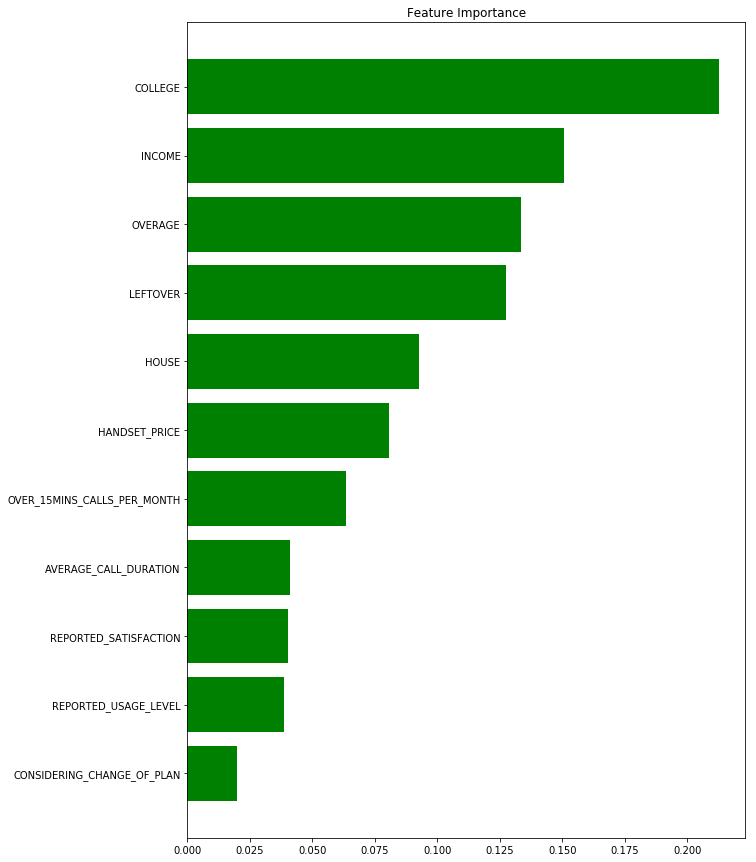

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(X_train.shape[1]), importances[indices], align='center', color='green', ecolor='black')
plt.yticks(range(X_train.shape[1]), feat_labels, rotation=0)
plt.gca().invert_yaxis()
plt.show()